## Import libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Import dataset

In [71]:
wine_df = pd.read_csv('winequality-red.csv')

## EDA

Display first 5 rows

In [72]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Get the shape of the dataset

In [73]:
wine_df.shape

(1599, 12)

Split into dependent and independent variables

In [74]:
X = wine_df.drop(['quality'], axis=1)
Y = wine_df['quality']

Unique Y values

In [75]:
list(Y.unique())

[5, 6, 7, 4, 8, 3]

Describe key statistics

In [76]:
wine_desc  = wine_df.describe().T
wine_desc

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Visualizations

### Fixed acidity vs Volatile acidity

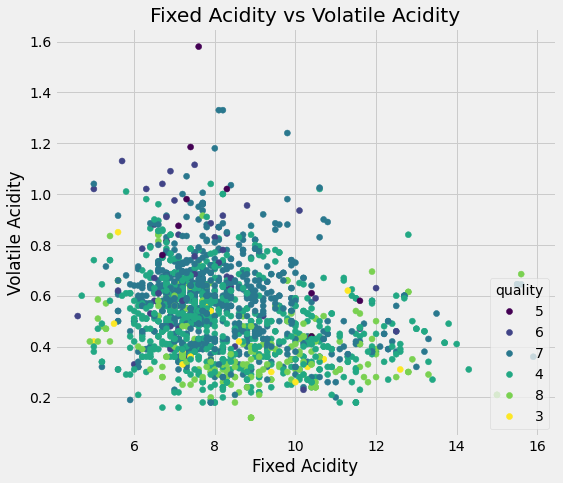

In [77]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,7))


#colors = {'Iris-setosa':1, 'Iris-virginica':2, 'Iris-versicolor':3}
#legend_desc = {v: k for k, v in colors.items()}

scatter = plt.scatter(X['fixed acidity'], X['volatile acidity'], c=Y)

#labels=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']
plt.legend(handles = scatter.legend_elements()[0],labels=list(Y.unique()),  loc="lower right", title="quality")
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.title('Fixed Acidity vs Volatile Acidity')
plt.show()

### Heatmap

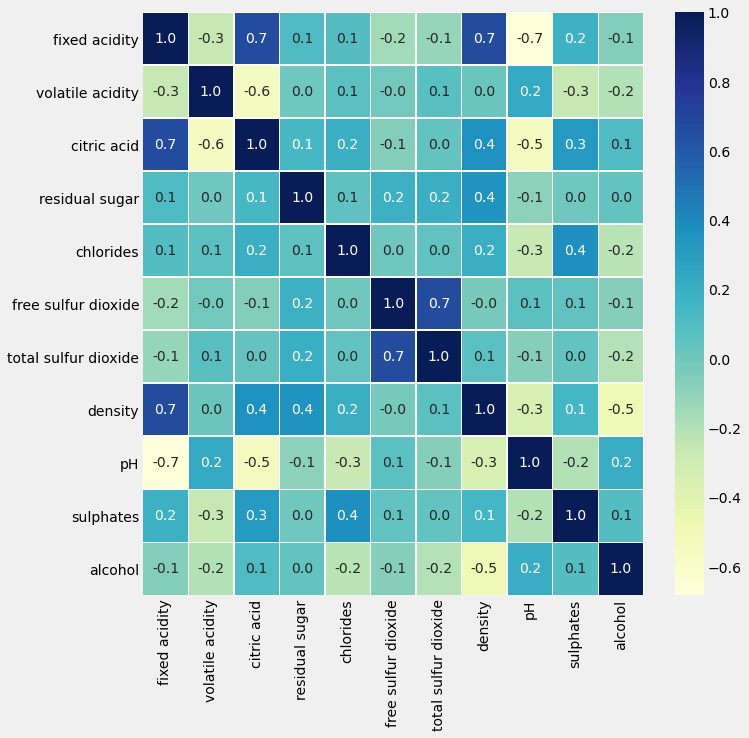

In [78]:
_,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'YlGnBu')
plt.show()

### Count of each dependent label

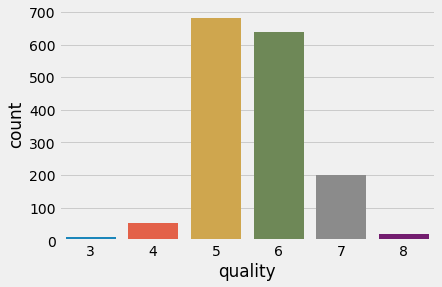

In [79]:
sns.countplot(x='quality', data=wine_df)

### Scaling data to plot boxplots

In [80]:
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X))
X_scaled.columns=X.columns

In [81]:
data_0_3 = X_scaled.iloc[:, 0:3]
data2 = pd.concat([wine_df['quality'],data_0_3],axis=1)
data2 = pd.melt(data2,id_vars="quality",var_name="features",value_name='value')


### Box plot for first three columns

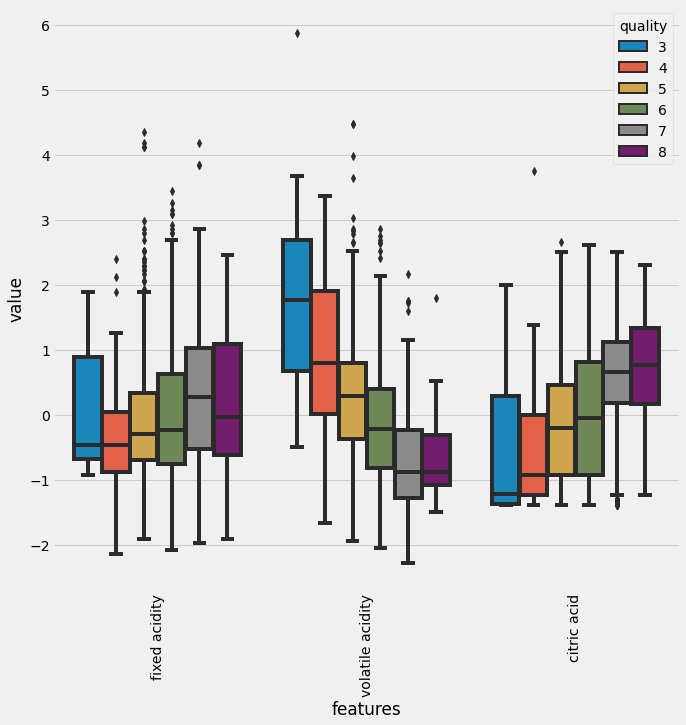

In [82]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x="features", y="value", hue="quality", data=data2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Box plot for next three columns

In [83]:
data_3_6 = X_scaled.iloc[:, 3:6]
data2 = pd.concat([wine_df['quality'],data_3_6],axis=1)
data2 = pd.melt(data2,id_vars="quality",var_name="features",value_name='value')


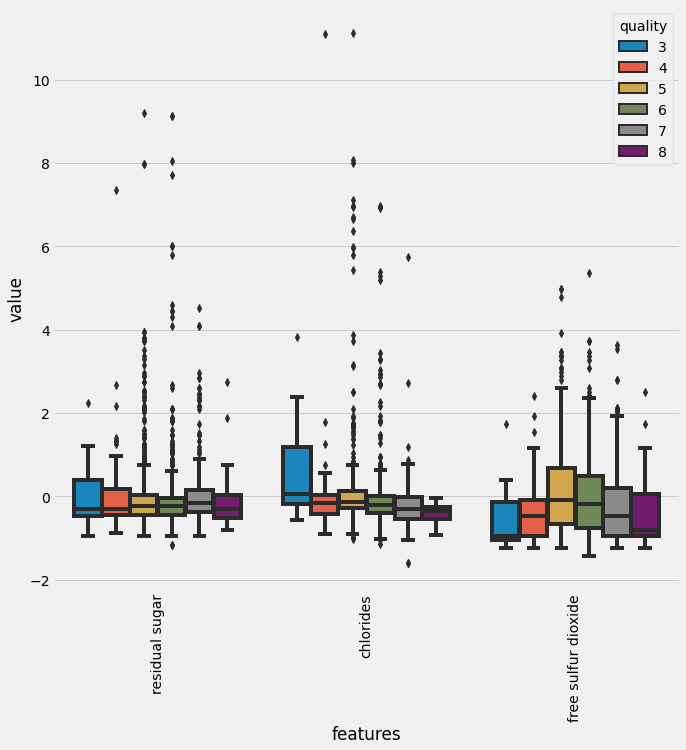

In [84]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x="features", y="value", hue="quality", data=data2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Box plot for next three columns

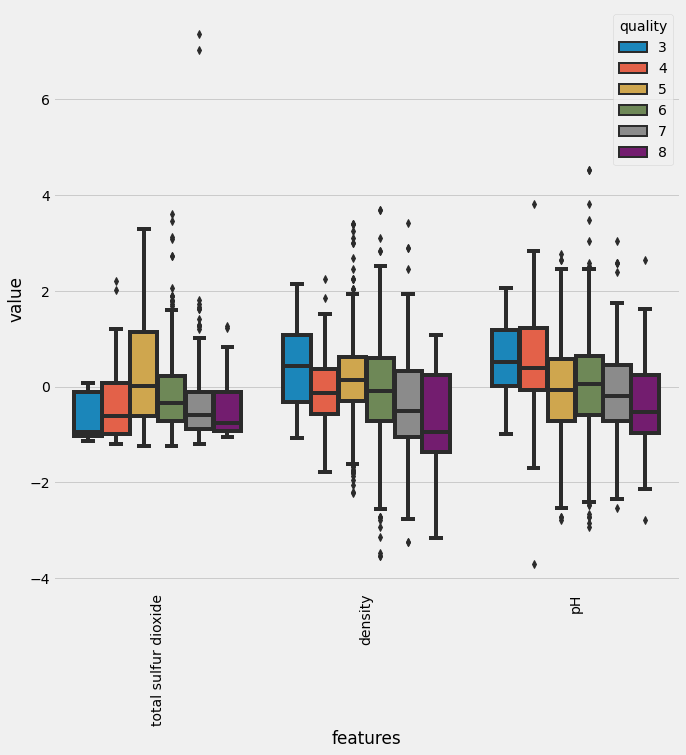

In [85]:
data_6_9 = X_scaled.iloc[:, 6:9]
data2 = pd.concat([wine_df['quality'],data_6_9],axis=1)
data2 = pd.melt(data2,id_vars="quality",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
ax=sns.boxplot(x="features", y="value", hue="quality", data=data2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

### Pairplot to determine realtionships

C:\Users\Dilsher\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


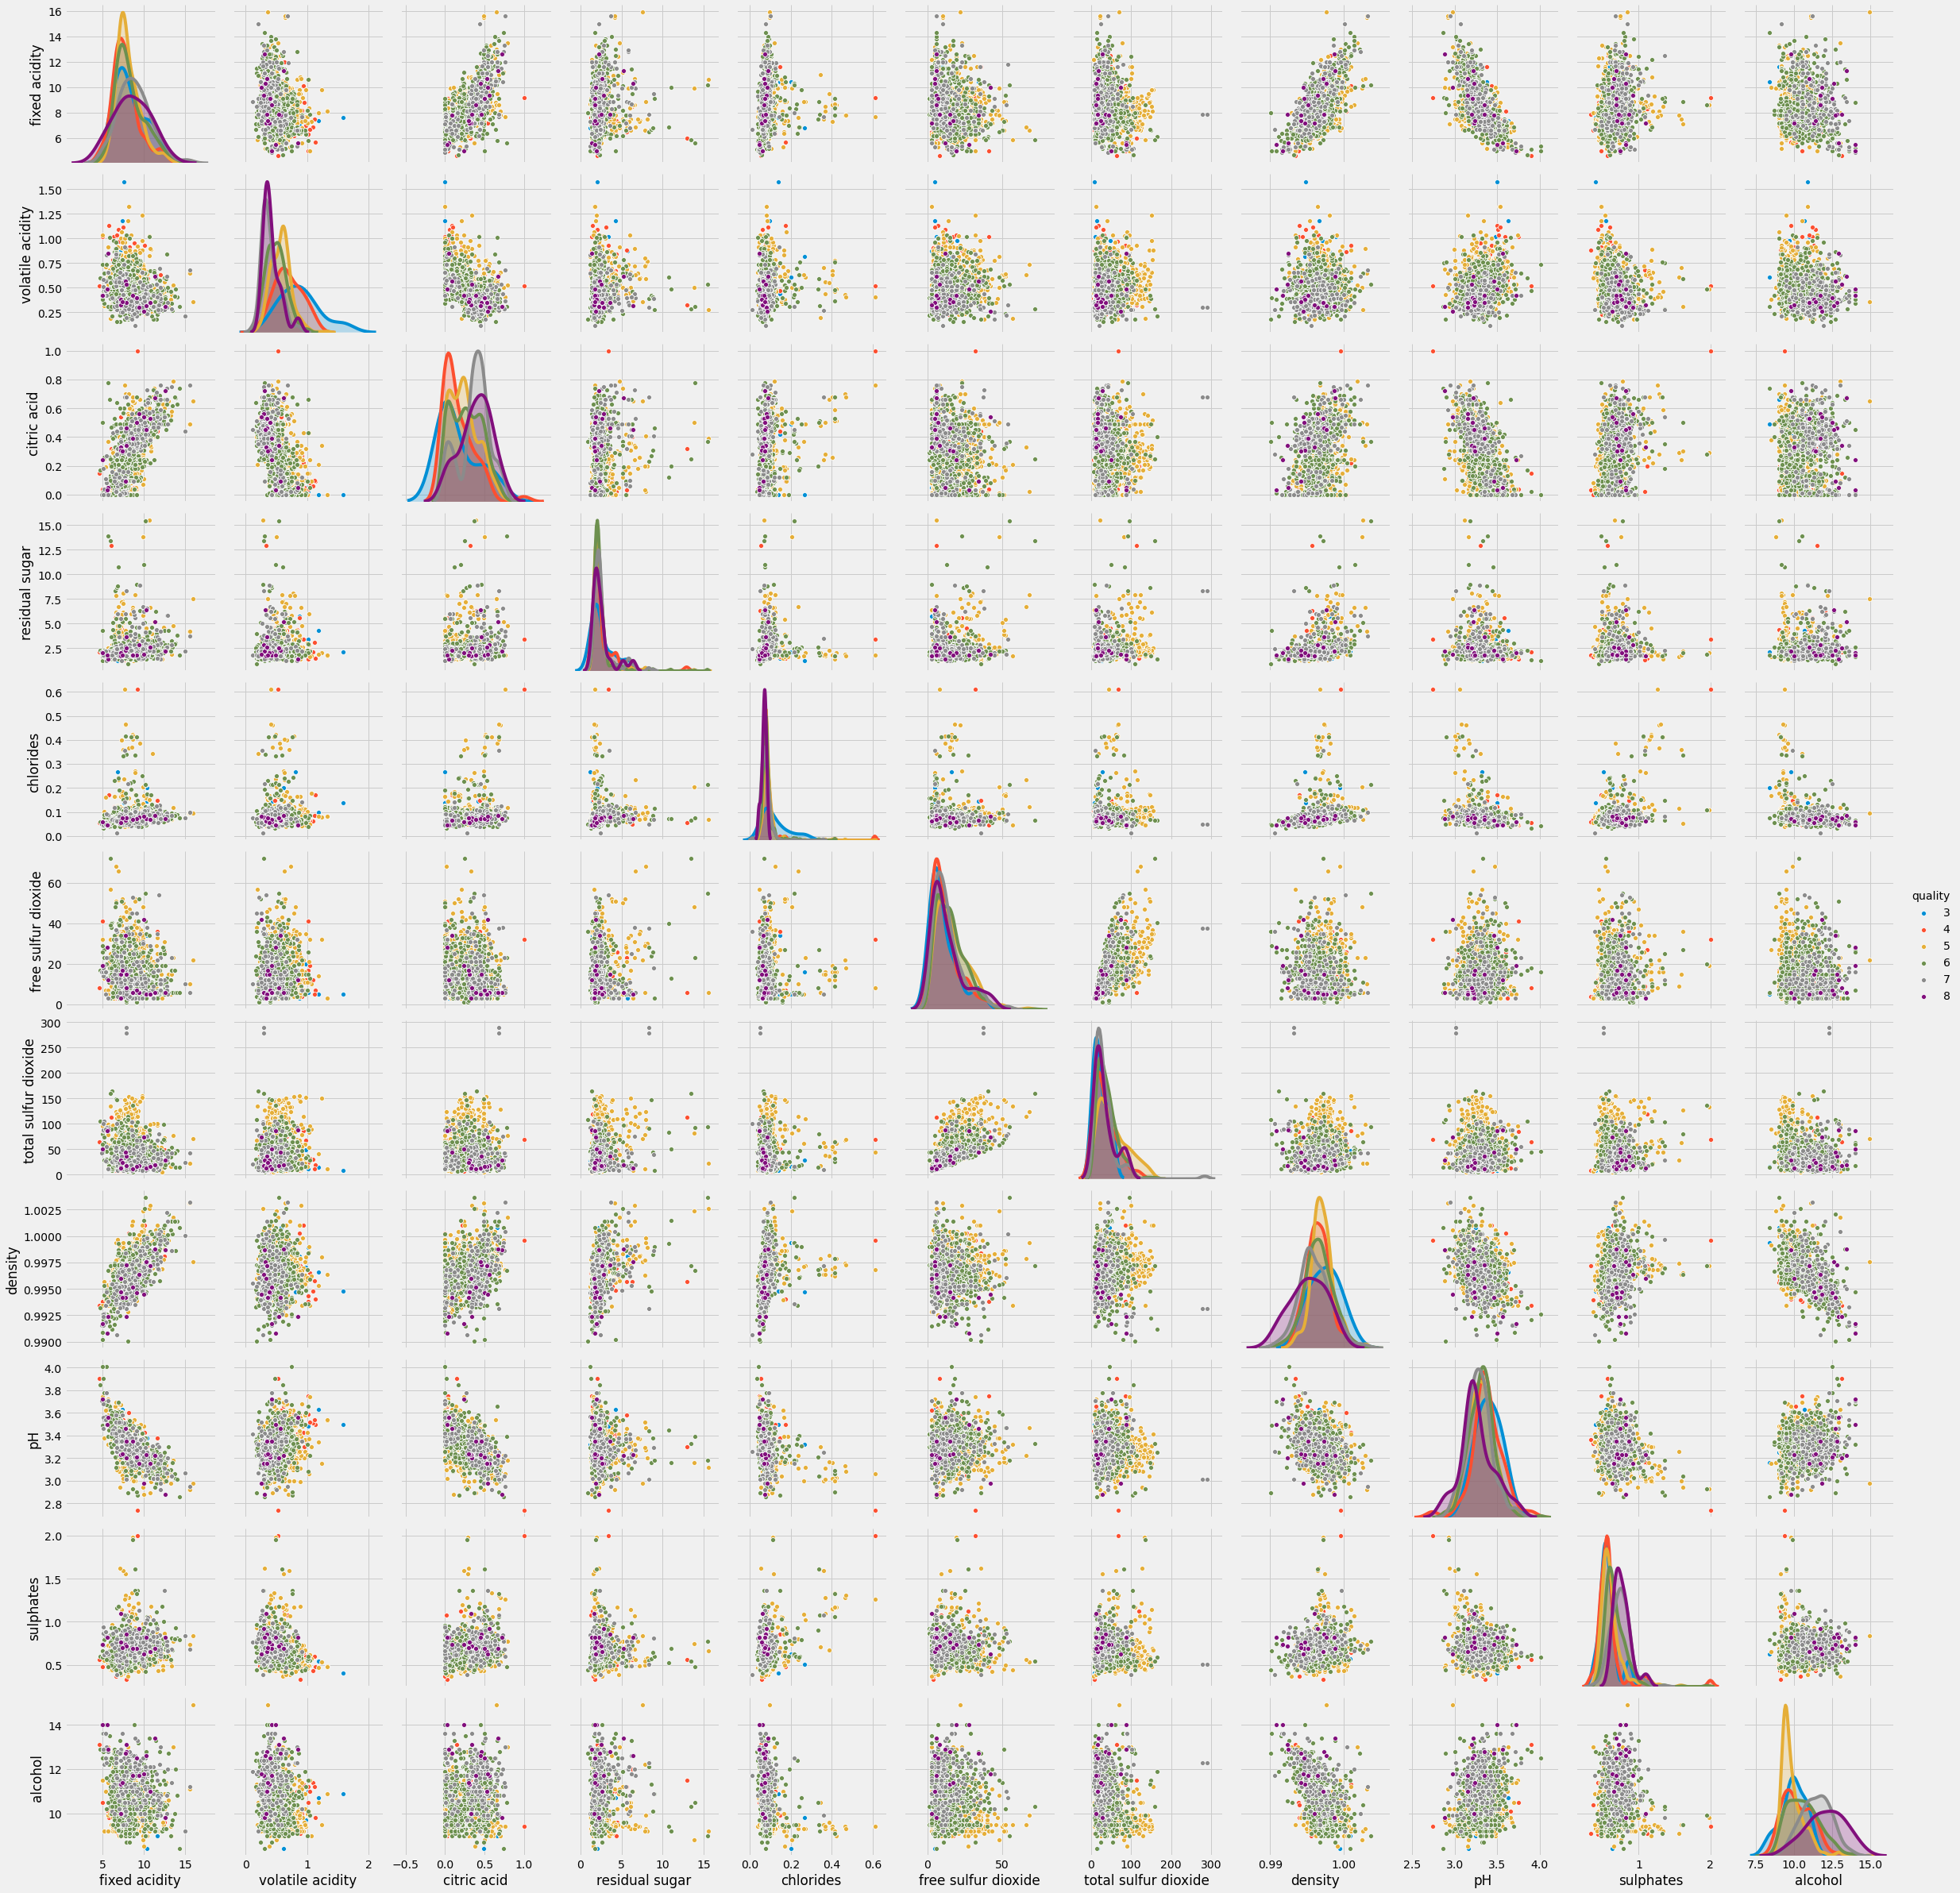

In [86]:
sns.pairplot(wine_df, hue="quality", size=3, diag_kind="kde")

## Feature Engineering

Merge Fixed acidity and volatile acidity

In [87]:
acidity_df = X['fixed acidity']+X['volatile acidity']
X = X.drop(columns = ['fixed acidity', 'volatile acidity'], axis = 1)


In [88]:
X = pd.concat([acidity_df, X],axis=1)

In [91]:
X['Acidity']=X[0]


In [95]:
X = X.drop(X.columns[[0]], axis=1)

In [96]:
X.head()

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Acidity
0,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10
1,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,8.68
2,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,8.56
3,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,11.48
4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8.10
